In [1]:
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

K=8
death_ratio = np.array([0.00000000e+00, 3.36964689e-06, 2.19595034e-05, 4.49107573e-05,
               1.88422215e-04, 4.99762978e-04, 1.89895681e-03, 7.40632275e-03])

all_death = pd.read_csv("../data/orszagos_halott.csv", sep=',')[:755]
death_orig = np.array(all_death[181:181+180]["Hétnapos mozgóátlag"])


sett_types = pd.read_csv("../../../data/hun/HU_places_admin_pop_ZIP_latlon.csv",
           sep=',',
           header=0)

KSH = pd.read_csv("../../../data/hun/KSHCommuting_c1ID_c1name_c2ID_c2name_comm_school_work_DIR.csv",
           sep=',',
           header=0)

pops = sett_types.set_index("place").to_dict()["population"]
pops_code = sett_types.set_index("KSH code").to_dict()["population"]

In [3]:
def get_inf_curve(filename, death = None, K= 8):
    df = pd.read_csv(filename, sep=',')
    inf_cols = [c for c in df.columns if c[0:2]=='I_']
    inf_cols2 = [c for c in df.columns if c[0:2]=='I2']
    Is = df.filter(inf_cols, axis=1)
    Is2 = df.filter(inf_cols2, axis=1)
    
    I = np.zeros((len(Is), K, len(Is.columns)//K))
    for c in Is.columns:
        _,city,age = c.split("_")
        I[:,int(age), int(city)] = Is.loc[:, c]
    I2 = np.zeros((len(Is2), K, len(Is2.columns)//K))
    for c in Is2.columns:
        _,city,age = c.split("_")
        I2[:,int(age), int(city)] = Is2.loc[:, c]
    
    I = np.sum(I, axis=2)
    I2 = np.sum(I2, axis=2)
    if type(death) != None:
        return np.sum(I*death, axis=1)+np.sum(I2*death, axis=1), Is.sum(axis=1), Is2.sum(axis=1)
    else:
        return Is.sum(axis=1), Is2.sum(axis=1)

def fit(x,y):
    min_ind = 0
    MIN = 1e12
    for shift in range(25):
        orig_shifted = x[shift:len(y)+25-(25-shift)]
        l2 = np.sqrt(np.sum((orig_shifted-y)**2))
        if l2 < MIN:
            MIN = l2
            min_ind = shift
    return min_ind, MIN


# District aggregation

### Original:

$$
w_{k,l} = \frac{\sum\limits_{i \in I_k} \sum\limits_{j \in I_l} w_{i,j} n_i n_j}{m_k m_l}
$$

### New:
$$
\hat{w}_{k,l} = \frac{\sum\limits_{i \in I_k} \sum\limits_{j \in I_l} w_{i,j}\phi_j n_i n_j}{m_k \sum\limits_{j \in I_l}\phi_j n_j}
$$

City has 1.06% less total infections
City has 0.62% less total infections


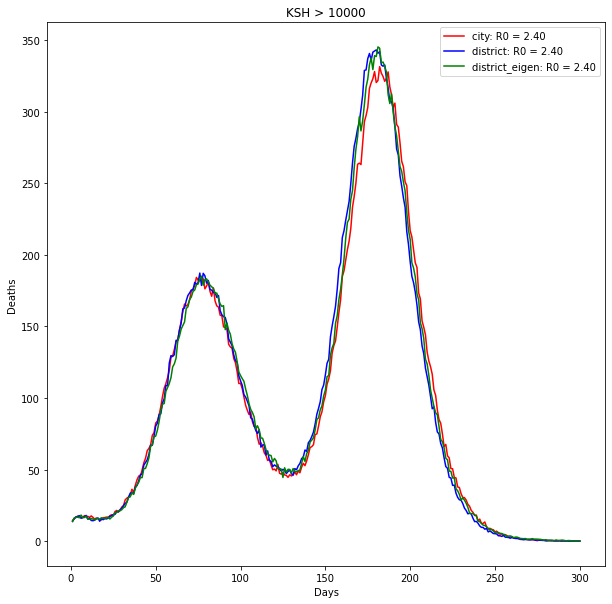

In [4]:
for th in [10000]:
    plt.figure(figsize=(10,10))
    city = f"KSH2_{th}/base"
    district = f"KSH2_{th}/district"
    district_eigen = f"KSH2_{th}/district_eigen"

    R0 = np.linspace(2.0, 2.6, 10)
    for i in [6]:
        death, Is, Is2 = get_inf_curve(f"../../output/{city}/{i}.txt", death = death_ratio*10)
        death_d, Is_d, Is2_d = get_inf_curve(f"../../output/{district}/{i}.txt", death = death_ratio*10)
        death_d2, Is_d2, Is2_d2 = get_inf_curve(f"../../output/{district_eigen}/{i}.txt", death = death_ratio*10)

        x = np.array(list(range(1, len(death)+1)))
        plt.plot(x, death, label=f"city: R0 = {R0[i]:.2f}", c='r')
        x = np.array(list(range(1, len(death_d)+1)))
        plt.plot(x, death_d, label=f"district: R0 = {R0[i]:.2f}", c='b')
        x = np.array(list(range(1, len(death_d2)+1)))
        plt.plot(x, death_d2, label=f"district_eigen: R0 = {R0[i]:.2f}", c='g')

    plt.legend()
    plt.xlabel('Days')
    plt.ylabel("Deaths")
    plt.title(f"KSH > {th}")

    print(f"City has {100-100*sum(death)/sum(death_d):.2f}% less total infections")
    print(f"City has {100-100*sum(death)/sum(death_d2):.2f}% less total infections")

City has 0.20% less total infections
City has 0.32% less total infections


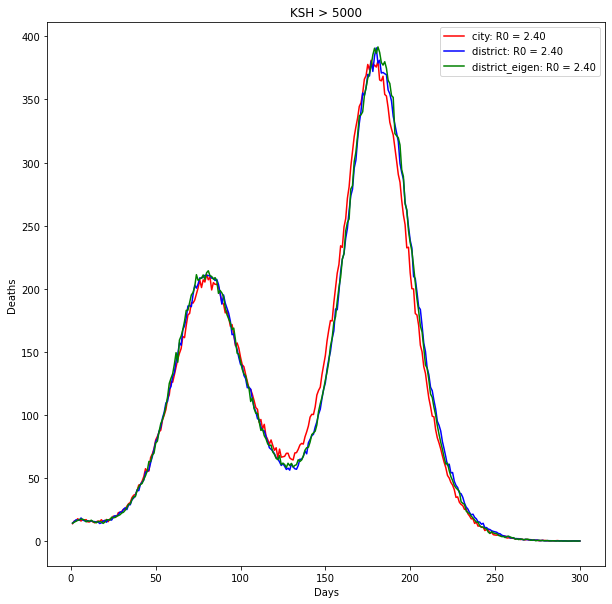

In [8]:
for th in [5000]:
    plt.figure(figsize=(10,10))
    city = f"KSH2_{th}/base"
    district = f"KSH2_{th}/district"
    district_eigen = f"KSH2_{th}/district_eigen"

    R0 = np.linspace(2.0, 2.6, 10)
    for i in [6]:
        death, Is, Is2 = get_inf_curve(f"../../output/{city}/{i}.txt", death = death_ratio*10)
        death_d, Is_d, Is2_d = get_inf_curve(f"../../output/{district}/{i}.txt", death = death_ratio*10)
        death_d2, Is_d2, Is2_d2 = get_inf_curve(f"../../output/{district_eigen}/{i}.txt", death = death_ratio*10)

        x = np.array(list(range(1, len(death)+1)))
        plt.plot(x, death, label=f"city: R0 = {R0[i]:.2f}", c='r')
        x = np.array(list(range(1, len(death_d)+1)))
        plt.plot(x, death_d, label=f"district: R0 = {R0[i]:.2f}", c='b')
        x = np.array(list(range(1, len(death_d2)+1)))
        plt.plot(x, death_d2, label=f"district_eigen: R0 = {R0[i]:.2f}", c='g')

    plt.legend()
    plt.xlabel('Days')
    plt.ylabel("Deaths")
    plt.title(f"KSH > {th}")

    print(f"City has {100-100*sum(death)/sum(death_d):.2f}% less total infections")
    print(f"City has {100-100*sum(death)/sum(death_d2):.2f}% less total infections")